# Census Bureau Data Analysis

In [13]:
# Import Libraries and Load the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "../datasets/Adult/adult_dataset.csv"
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
# Data Cleaning
# Check for missing values
df.isnull().sum()

# Replace missing values in categorical columns with 'Unknown'
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

# For numerical columns, replace missing values with the mean
df['fnlwgt'].fillna(df['fnlwgt'].mean(), inplace=True)

# Convert 'income' to binary values: <=50K -> 0, >50K -> 1
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20824\441299849.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna('Unknown', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20824\441299849.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

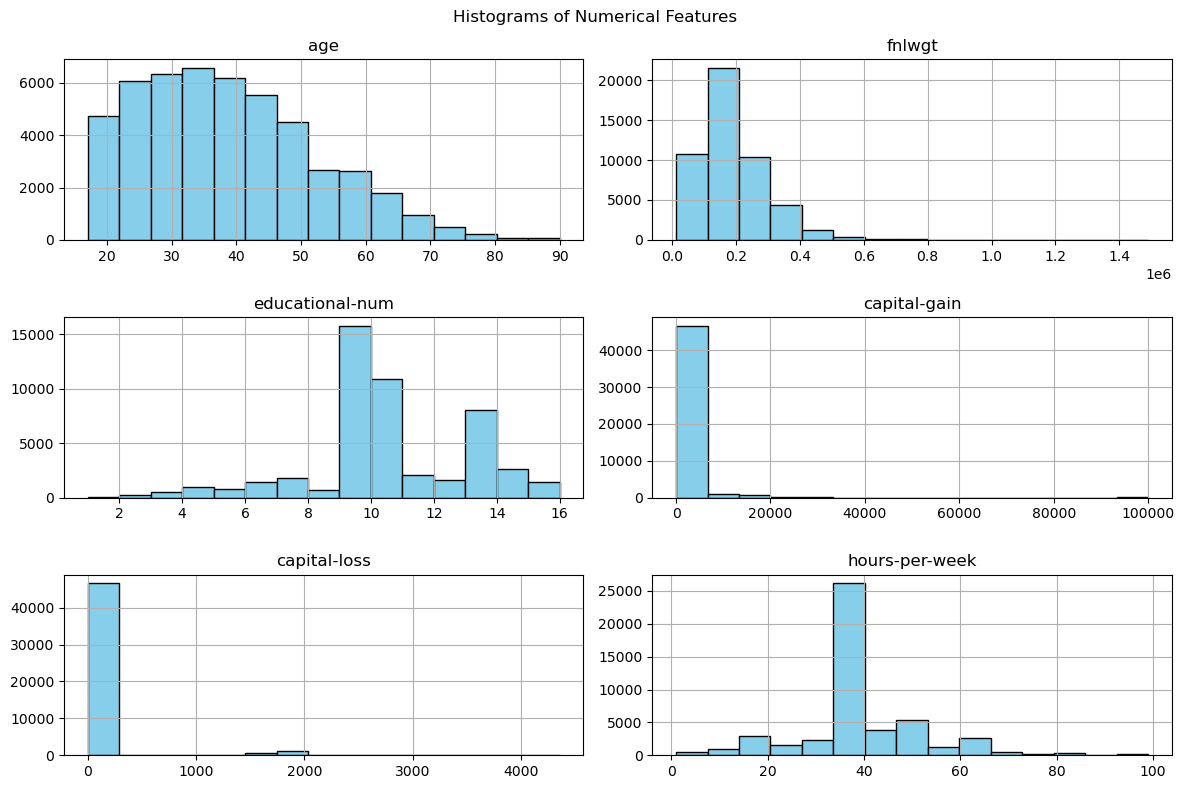

In [15]:
# Histograms of Numerical Features
# Numerical columns to plot histograms for
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Plot histograms for each numerical column
df[numerical_cols].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()


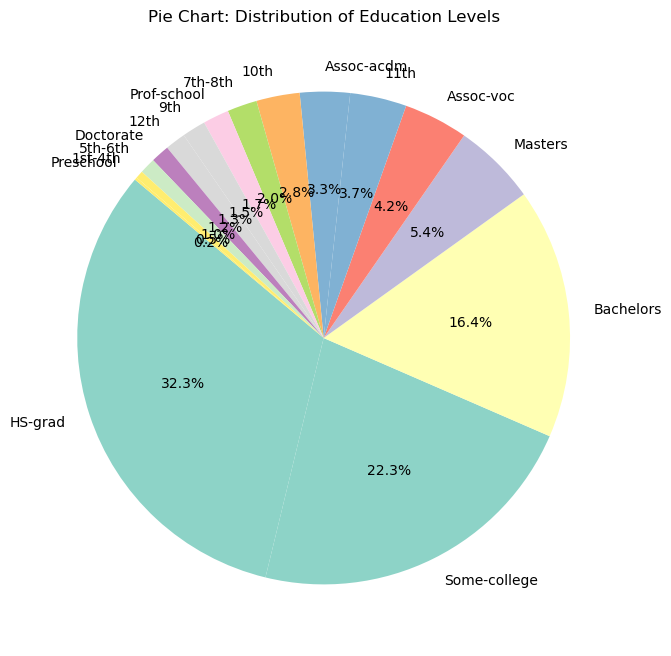

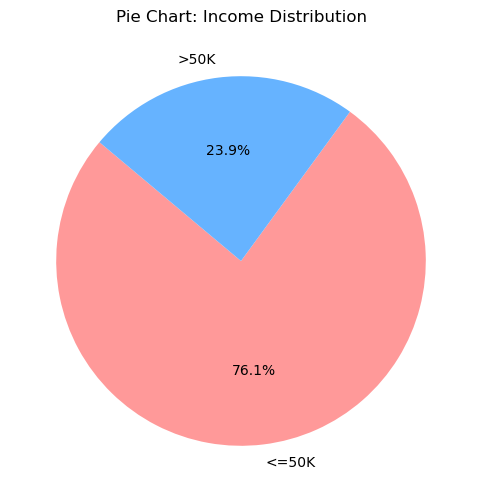

In [21]:
# Pie chart for education
plt.figure(figsize=(8, 8))
df['education'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Pie Chart: Distribution of Education Levels')
plt.ylabel('')
plt.show()

# Pie chart for income
plt.figure(figsize=(6, 6))
df['income'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, labels=['<=50K', '>50K'], colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart: Income Distribution')
plt.ylabel('')
plt.show()


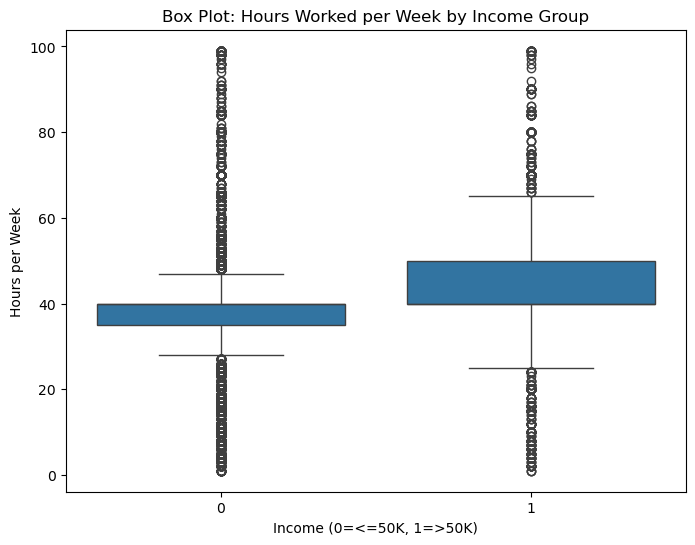

In [22]:
# Box plot: hours-per-week by income
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Box Plot: Hours Worked per Week by Income Group')
plt.xlabel('Income (0=<=50K, 1=>50K)')
plt.ylabel('Hours per Week')
plt.show()


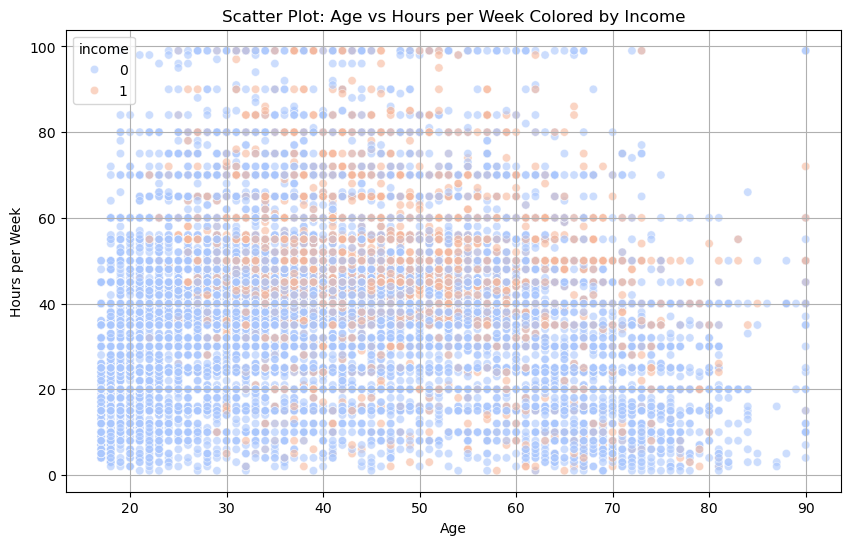

In [23]:
# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='hours-per-week', hue='income', palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot: Age vs Hours per Week Colored by Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()


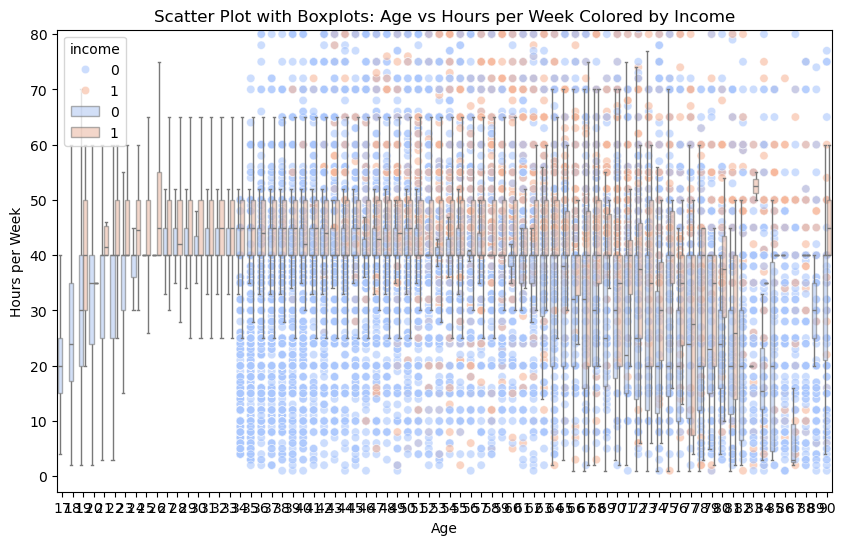

In [25]:
# Create a scatter plot with boxplots on the margins
plt.figure(figsize=(10, 6))

# Create the scatter plot
ax = sns.scatterplot(data=df, x='age', y='hours-per-week', hue='income', palette='coolwarm', alpha=0.6)

# Add boxplots along the x and y axes
sns.boxplot(data=df, x='age', y='hours-per-week', hue='income', palette='coolwarm', ax=ax, showfliers=False, boxprops=dict(alpha=0.6))

# Title and labels
plt.title('Scatter Plot with Boxplots: Age vs Hours per Week Colored by Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week')

# Display the plot
plt.show()